In [166]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2

In [167]:
%matplotlib inline

In [170]:
image_path = "art/Screenshot from 2024-11-30 21-35-03.png"
THRESHOLD = 50000
img = Image.open(image_path)
width, height = img.size

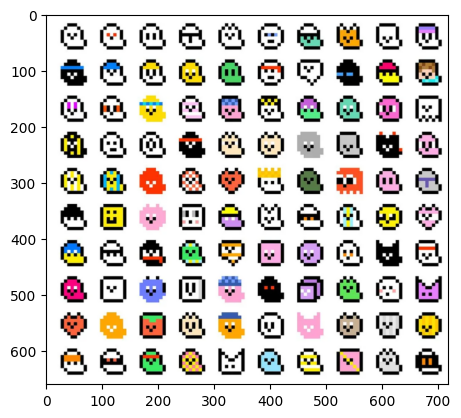

In [171]:
plt.imshow(img)

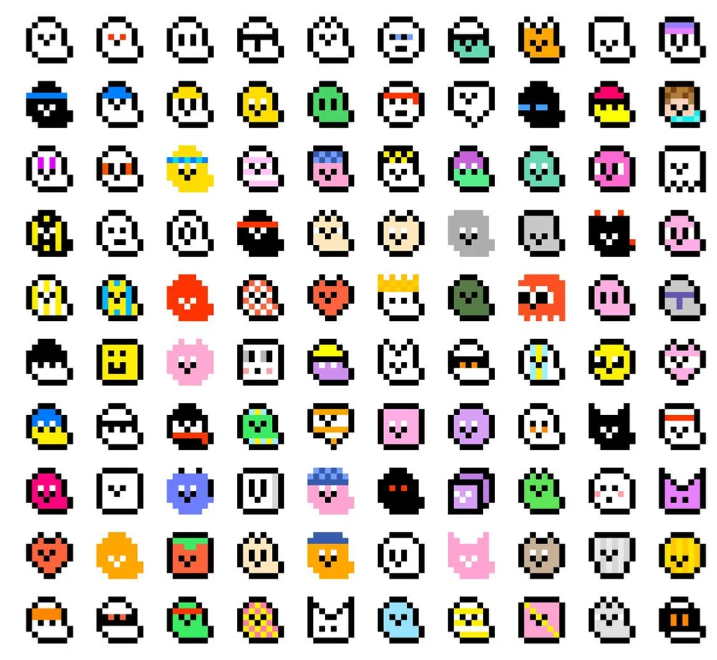

In [177]:
img

In [172]:
Y = np.sum(img, axis=1)
y = np.max(Y) - Y
pairs_y = []
for i in range(len(y)-1):
    if y[i] < THRESHOLD and y[i+1] > THRESHOLD:
        pairs_y.append(i+1)
    if y[i+1] < THRESHOLD and y[i] > THRESHOLD:
        pairs_y.append(i+1)
print(pairs_y)
plt.imshow(np.array(img)[:,pairs_y[0]:pairs_y[1]])

X = np.sum(img, axis=1)
x = np.max(X) - X
pairs_x = []
for i in range(len(x)-1):
    if x[i] < THRESHOLD and x[i+1] > THRESHOLD:
        pairs_x.append(i+1)
    if x[i+1] < THRESHOLD and x[i] > THRESHOLD:
        pairs_x.append(i+1)
print(pairs_x)
plt.imshow(np.array(img)[pairs_x[0]:pairs_x[1],:])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

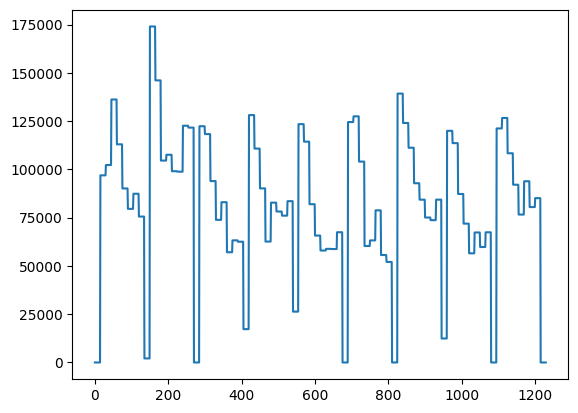

In [163]:
plt.plot(Y)

# Extracting

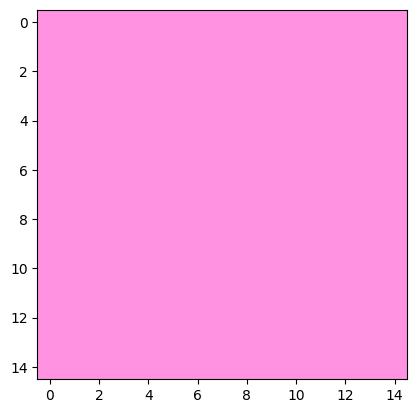

In [165]:
imgs = []
cnt = 0
for i in range(len(pairs_x)//2):
    for j in range(len(pairs_y)//2):
        #print(i,j)
        a,b,c,d = pairs_x[2*i],pairs_x[2*i+1],pairs_y[2*j],pairs_y[2*j+1]
        crop_rectangle = (a, c, b, d)   
        cropped_im = img.crop(crop_rectangle)
        cropped_im = cropped_im.resize((8, 8), Image.Resampling.LANCZOS) 
        imgs.append(cropped_im)
        #cropped_im.save("outputs/"+image_path+"_"+str(cnt)+'icon.ico', sizes=[(8,8)])
        cnt += 1
plt.imshow(img.crop(crop_rectangle))

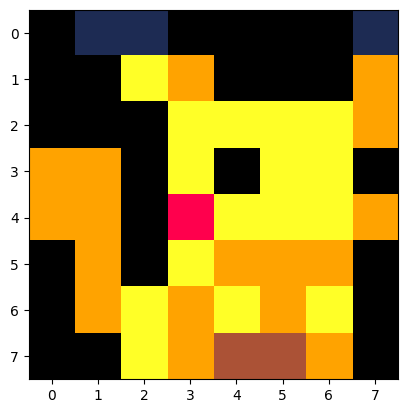

In [133]:
for k in range(len(imgs)):
    plt.imshow(imgs[k])